In [201]:
library(tidyverse)
library(ggplot2)
library(ggpubr)

In [202]:
getwd()

[1] "/share/Data/hxie/project/202305/esc_xwliu/esc0615_version2/HiC_analysis/Gr_density_new"

In [204]:
pos <- read_csv("filtered_pos.csv") %>% pull(pos)

Rows: 274 Columns: 1
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): pos

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [205]:
metadata <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/RNA_analysis/s1014_metadata_X_noM_noXistneg.csv")

New names:
• `` -> `...1`
Rows: 904 Columns: 18
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ...1, orig.ident, sample2, sample3, cellcycle_threshold, day, cell...
dbl (11): nCount_RNA, nFeature_RNA, nCount_SCT, nFeature_SCT, SCT_snn_res.1....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [206]:
cellnames <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0615_version2/HiC_analysis/radius_of_gyration/cellname_rmsd_pass.csv") %>% rename(cellname = `0`) %>% filter(cellname != "d4A8") %>% pull(cellname)

New names:
• `` -> `...1`
Rows: 238 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): 0
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [207]:
density_B6 <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0615_version2/HiC_analysis/Gr_density_new/res/B6_chrX_0_3_notnorm.csv") %>% pivot_longer(!c('start'), values_to = 'density', names_to = 'cellname')
density_Cast <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0615_version2/HiC_analysis/Gr_density_new/res/Cast_chrX_0_3_notnorm.csv") %>% pivot_longer(!c('start'), values_to = 'density', names_to = 'cellname')

Rows: 805 Columns: 238
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (238): start, d0A1, d0A14, d0A16, d0A17, d0A2, d0A21, d0A22, d0A24, d0A2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 795 Columns: 238
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (238): start, d0A1, d0A14, d0A16, d0A17, d0A2, d0A21, d0A22, d0A24, d0A2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

In [209]:
sel <- density_B6 %>% filter(density>0) %>% filter(density != Inf)  %>% group_by(start) %>% summarise(count = n()) %>% filter(count > 100) %>% pull(start)
sel2 <- density_Cast %>% filter(density>0) %>% filter(density != Inf)  %>% group_by(start) %>% summarise(count = n()) %>% filter(count > 100) %>% pull(start)

In [210]:
density_B6 <- density_B6 %>% filter(start %in% sel)
density_Cast <- density_Cast %>% filter(start %in% sel2)

In [211]:
plot_B6 <- density_B6 %>% left_join(metadata %>% select(cellname, plot_cluster)) %>% group_by(plot_cluster, start) %>% filter(!is.na(density)) %>%
    summarise(median_density = median(density), mean_density = mean(density), n = n(), sd = sd(density)) %>%
    mutate(se = sd/sqrt(n)) %>% mutate(allele = "B6")

Joining with `by = join_by(cellname)`
`summarise()` has grouped output by 'plot_cluster'. You can override using the `.groups` argument.


In [212]:
plot_Cast <- density_Cast %>% left_join(metadata %>% select(cellname, plot_cluster)) %>% group_by(plot_cluster, start) %>% filter(!is.na(density)) %>%
    summarise(median_density = median(density), mean_density = mean(density), n = n(), sd = sd(density)) %>%
    mutate(se = sd/sqrt(n)) %>% mutate(allele = "Cast")

Joining with `by = join_by(cellname)`
`summarise()` has grouped output by 'plot_cluster'. You can override using the `.groups` argument.


Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


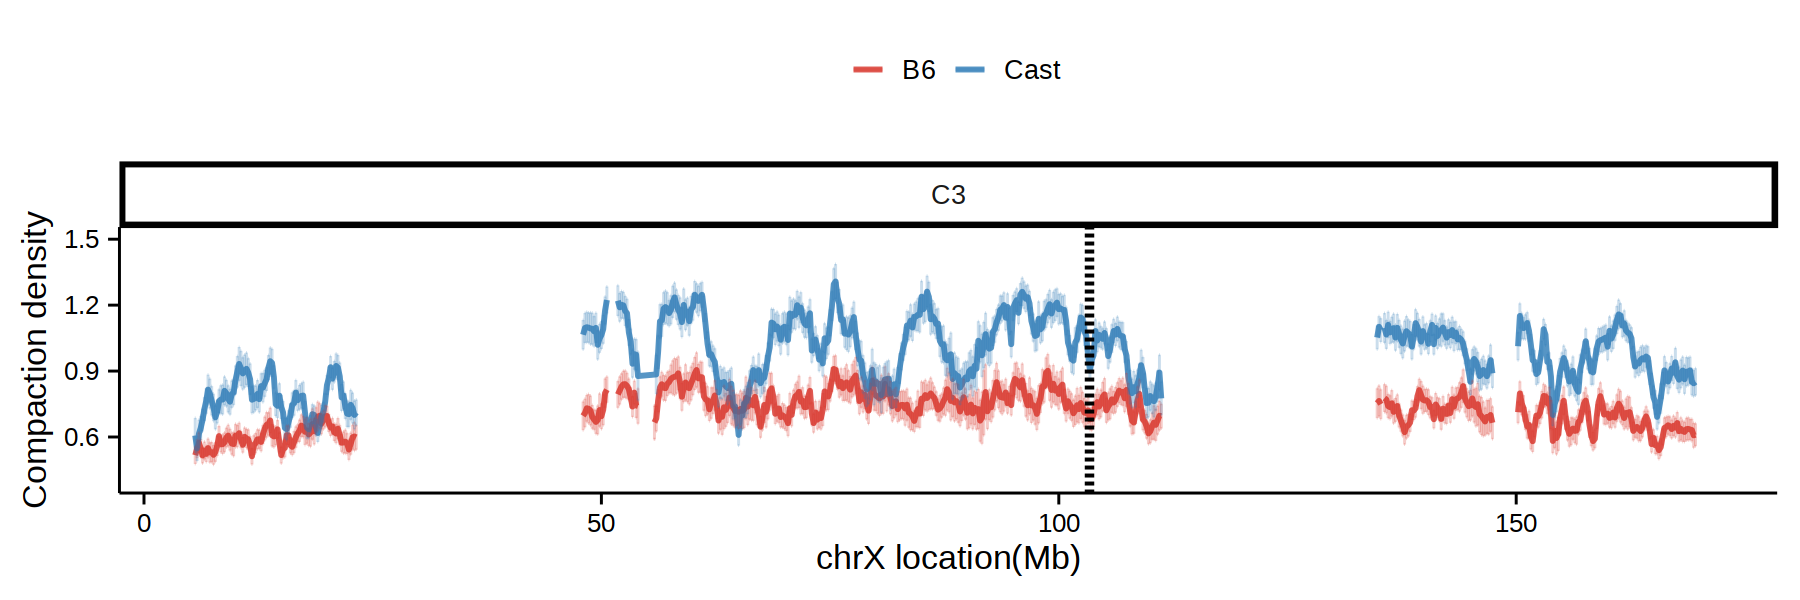

In [214]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 300)

plot_B6 %>% rbind(plot_Cast) %>% mutate(plot_cluster = paste0("C", plot_cluster)) %>% filter(plot_cluster %in% c("C3")) %>%
    mutate(mean_density = ifelse(start %in% pos, NA, mean_density)) %>%
    ggplot(aes(x=start/1000000, y=mean_density, color=allele, fill=allele)) + 
    geom_line(linewidth = 0.5, alpha = 0.8) +
    # geom_point(size = 0.05)+
    # geom_ribbon(aes(ymin=mean_density-se, ymax=mean_density+se), alpha=0.2, color=NA) +
    geom_errorbar(aes(ymin=mean_density-se, ymax=mean_density+se), linewidth=0.25,position=position_dodge(0), alpha = 0.25)+
    scale_color_manual(values = c('#d73027','#2c7bb6'), name = '') +
    xlab("chrX location(Mb)") + ylab("Compaction density") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + theme_classic() +
    ylim(0.4,1.5) + 
    geom_vline(xintercept = 103.4, linetype = "dashed", color = "black", size = 0.8) + facet_wrap(~plot_cluster) + 
    theme(legend.position = "top",
      text = element_text(family="Arial", size=8),
      panel.border = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      axis.line = element_line(color="black", linewidth = 0.25),
      axis.ticks = element_line(color="black", linewidth = 0.25),
      axis.text = element_text(color="black",size=6),
      legend.key = element_rect(colour = NA),
      legend.key.width = unit(0.3, "cm"),
      legend.key.height = unit(0.4, "cm"),
      axis.title=element_text(color="black",size=8,face="plain"),
  )

In [287]:
early_site <- read_csv("xist_site_6h.csv")
names(early_site) <- c('index','value')

New names:
• `` -> `...1`
Rows: 1711 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ...1, 0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [314]:
breaks <- c(0,25,50,110,135,170)  # 根据你的数据设置合适的刻度
limits <- c(0, 173)  # 根据你的数据设置合适的限制

In [306]:
xist_binding <- early_site %>% mutate(index = floor(index*100000/200000)*200000) %>% group_by(index) %>% mutate(value = mean(value)) %>%
    mutate(value = ifelse(index %in% pos, NA, value))

In [340]:
col_range <- c(0, 1.8)
line_range <- c(0, 75)
trans_factor <- diff(col_range) / diff(line_range)

In [341]:
convert_value <- function(value) {
    (value - line_range[1]) * trans_factor + col_range[1]
}

xist_binding$converted_value <- sapply(xist_binding$value, convert_value)

Warning message in geom_line(aes(x = start/1e+06, y = mean_density, color = allele, :
“Ignoring unknown aesthetics: fill”
Warning message in geom_errorbar(aes(x = start/1e+06, ymin = mean_density - se, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Removed 605 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


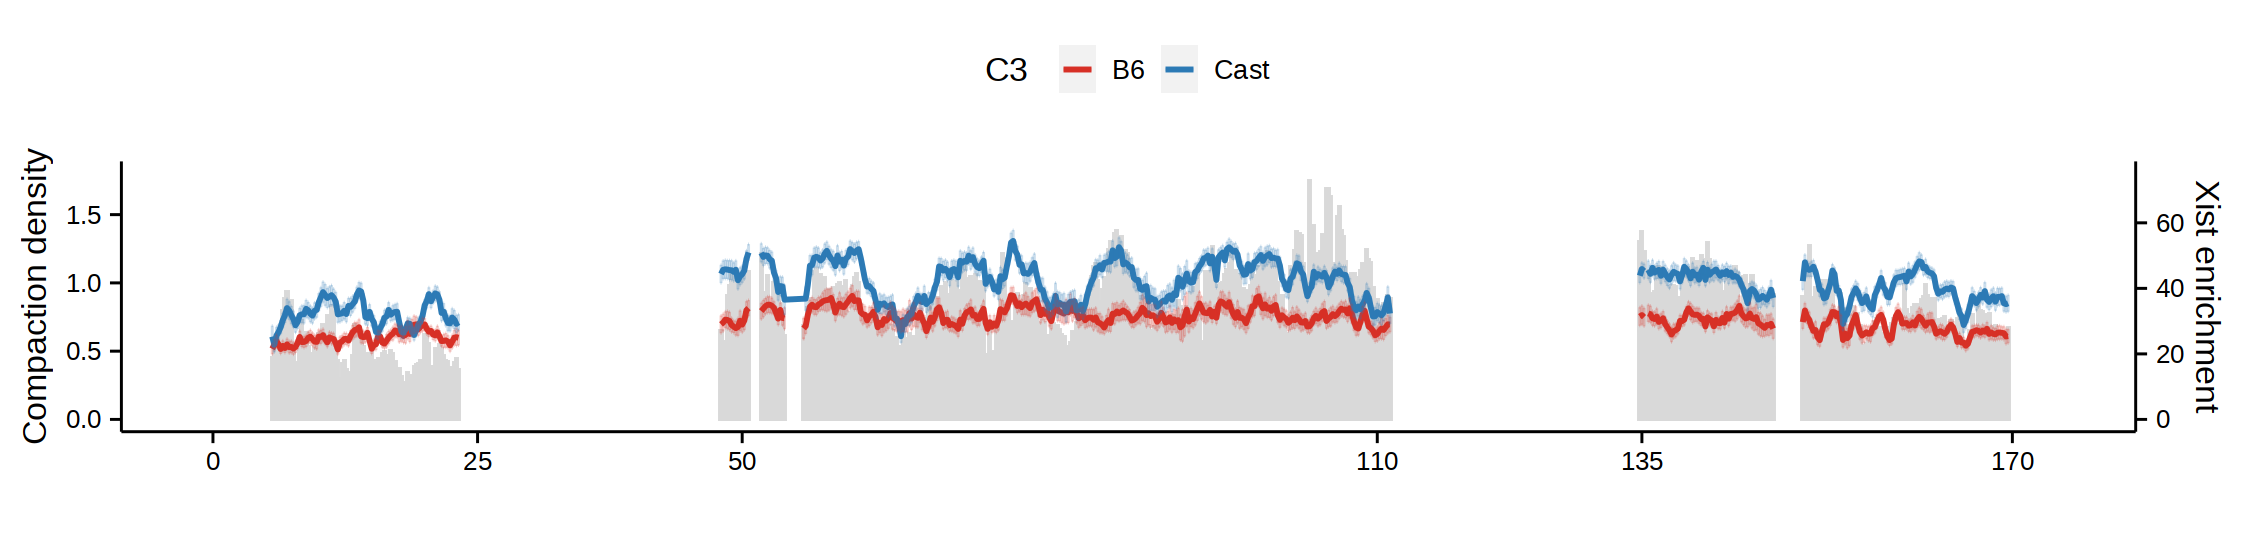

In [342]:
options(repr.plot.width = 7.5, repr.plot.height = 1.8, repr.plot.res = 300)

c3 <- plot_B6 %>% rbind(plot_Cast) %>% mutate(plot_cluster = paste0("C", plot_cluster)) %>% filter(plot_cluster %in% c("C3")) %>%
    mutate(mean_density = ifelse(start %in% pos, NA, mean_density)) %>%
    ggplot() + 
    geom_col(data = xist_binding, aes(x=index/1000000,y=converted_value), width = 0.2, size = 0.25, fill = "#d9d9d9", color = "#d9d9d9") +
    scale_y_continuous(
        limits = col_range,  # 主轴的范围设置为 col_range
        sec.axis = sec_axis(
                trans = ~(. - col_range[1]) / trans_factor + line_range[1], 
                name = "Xist enrichment")) +
    geom_line(aes(x = start/1000000, y = mean_density, color = allele, fill = allele)) + 
    scale_color_manual(values = c('#d73027','#2c7bb6'), name = 'C3  ') +
    geom_errorbar(aes(x=start/1000000, ymin=mean_density-se, ymax=mean_density+se, color = allele, fill = allele), linewidth=0.25,position=position_dodge(0), alpha = 0.25)+
    xlab(' ') + ylab('Compaction density') +scale_x_continuous(breaks = breaks, limits = limits) +
    theme(legend.position = "top",
      text = element_text(family="Arial", size=8),
      panel.border = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      axis.line = element_line(color="black", linewidth = 0.25),
      axis.ticks = element_line(color="black", linewidth = 0.25),
      axis.text = element_text(color="black",size=6),
      legend.key = element_rect(colour = NA),
      legend.key.width = unit(0.3, "cm"),
      legend.key.height = unit(0.4, "cm"),
      axis.title=element_text(color="black",size=8,face="plain"),
  )
c3

Warning message in geom_line(aes(x = start/1e+06, y = mean_density, color = allele, :
“Ignoring unknown aesthetics: fill”
Warning message in geom_errorbar(aes(x = start/1e+06, ymin = mean_density - se, :
“Ignoring unknown aesthetics: fill”
Warning message:
“Removed 605 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


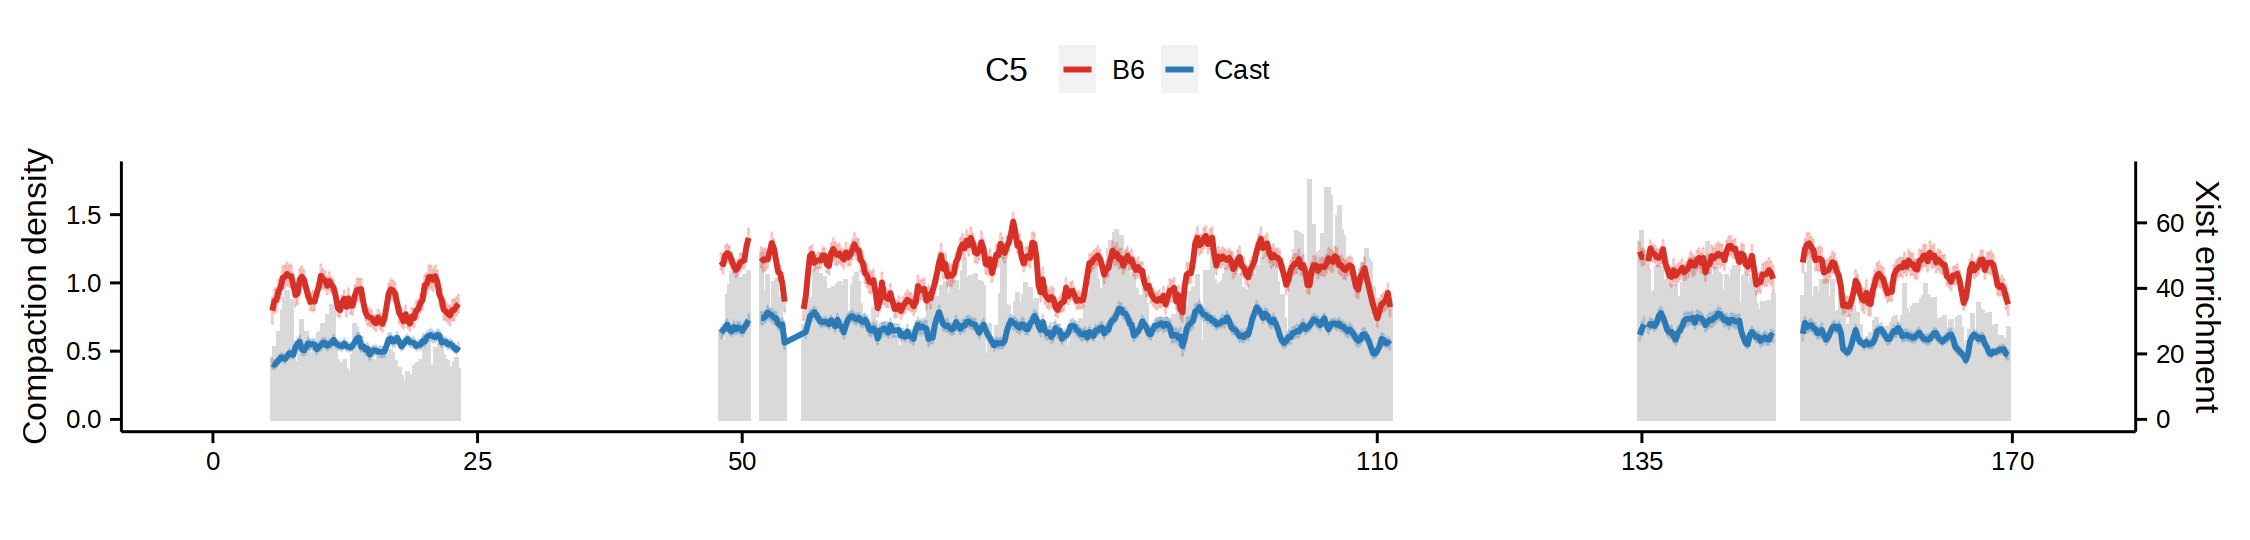

In [343]:
options(repr.plot.width = 7.5, repr.plot.height = 1.8, repr.plot.res = 300)

c5 <- plot_B6 %>% rbind(plot_Cast) %>% mutate(plot_cluster = paste0("C", plot_cluster)) %>% filter(plot_cluster %in% c("C5")) %>%
    mutate(mean_density = ifelse(start %in% pos, NA, mean_density)) %>%
    ggplot() + 
    geom_col(data = xist_binding, aes(x=index/1000000,y=converted_value), width = 0.2, size = 0.25, fill = "#d9d9d9", color = "#d9d9d9") +
    scale_y_continuous(
        limits = col_range,  # 主轴的范围设置为 col_range
        sec.axis = sec_axis(
                trans = ~(. - col_range[1]) / trans_factor + line_range[1], 
                name = "Xist enrichment")) +
    geom_line(aes(x = start/1000000, y = mean_density, color = allele, fill = allele)) + 
    scale_color_manual(values = c('#d73027','#2c7bb6'), name = 'C5  ') +
    geom_errorbar(aes(x=start/1000000, ymin=mean_density-se, ymax=mean_density+se, color = allele, fill = allele), linewidth=0.25,position=position_dodge(0), alpha = 0.25)+
    xlab(' ') + ylab('Compaction density') +scale_x_continuous(breaks = breaks, limits = limits) +
    theme(legend.position = "top",
      text = element_text(family="Arial", size=8),
      panel.border = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      axis.line = element_line(color="black", linewidth = 0.25),
      axis.ticks = element_line(color="black", linewidth = 0.25),
      axis.text = element_text(color="black",size=6),
      legend.key = element_rect(colour = NA),
      legend.key.width = unit(0.3, "cm"),
      legend.key.height = unit(0.4, "cm"),
      axis.title=element_text(color="black",size=8,face="plain"),
  )
c5

In [344]:
library(patchwork)
options(repr.plot.width = 15, repr.plot.height = 1.8, repr.plot.res = 300)
P <- c3 + c5

Warning message:
“Removed 605 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 605 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 605 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 605 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


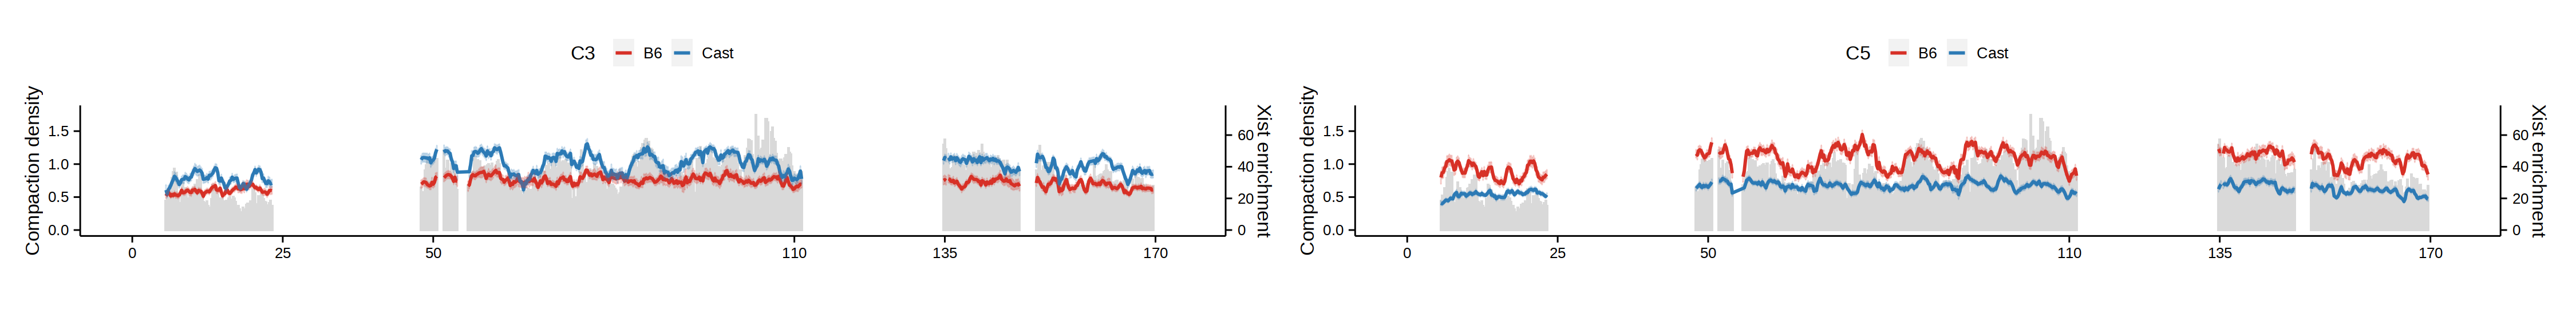

In [346]:
P
ggsave("/share/Data/hxie/project/202209/esc_xwliu/figures_0827/fig2/fig2_Compaction_density.svg", width = 15, height = 2.2, units = "in", dpi = 300)